## 計算梯度 (對單一值)

In [6]:
#y = X ^ 2
def func(x):
    return x ** 2

func(3)

9

In [26]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / (h)

In [27]:
dfunc(func,3)

6.000100000012054

In [11]:
def tfunc(f,x,t):
    d= dfunc(f,x)
    y=f(x)-d*x
    return d*t+y


Populating the interactive namespace from numpy and matplotlib


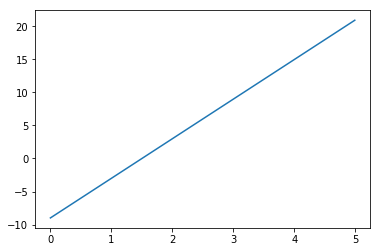

In [16]:
%pylab inline
from matplotlib import pyplot as plt
import numpy as np
x2= np.arange(0,5, 0.01)
y2= tfunc(func,3, x2)
plt.plot(x2, y2)

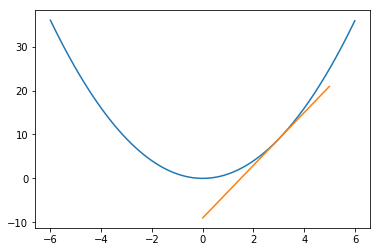

In [19]:
# 繪製 x ^ 2 
x = np.arange(-6,6, 0.01)
y= func(x)
plt.plot(x,y)

# 繪製x = 3 時的切線
x2= np.arange(0,5, 0.01)
y2= tfunc(func,3, x2)
plt.plot(x2, y2)

In [20]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [21]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):
    x = init_x
    res = [x]
    for i in range(epochs):
        grad = dfunc(func,x)
        x = x - grad * lr
        res.append(x)
    return np.array(res)


In [22]:
x = gradient_descent(func, -5, lr=0.8)

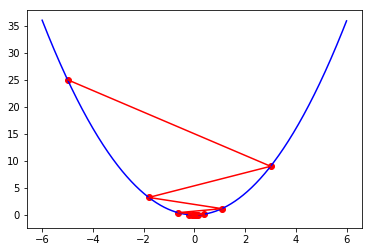

In [23]:
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')

In [28]:
x = gradient_descent(func, -5, lr=1)

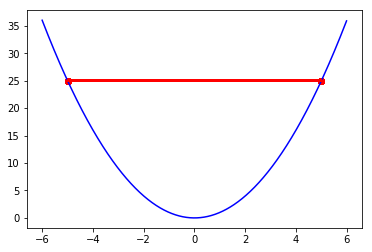

In [29]:
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')


In [30]:
x = gradient_descent(func, -5, lr=0.01)

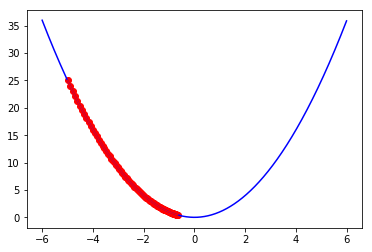

In [31]:
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')


## 計算梯度(針對矩陣)

In [33]:
# 初始網路 
x = np.array([0.6, 0.9])
np.random.seed(42)
weight= np.random.randn(2,3)
z= np.dot(x, weight)
z

array([ 1.66875536, -0.29369662,  0.17788986])

In [35]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

# 取得預測值 y_hat
y_hat= softmax_function(z)
y_hat

array([0.73222998, 0.10288817, 0.16488185])

In [36]:
y_hat.sum()

0.9999999999999999

In [38]:


# 計算代價(損失)
y= np.array([0,0,1])


def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

cross_entropy_err(y_hat,y)


1.8025260716416405

In [39]:
weight= np.random.randn(2,3)
weight

array([[ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]])

In [40]:
np.zeros_like(weight)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [52]:
def dfunc(f,x):
    h= 1e-4
    grad = np.zeros_like(x)
    it= np.nditer(x, flags=['multi_index'])
    while not it.finished:
        
        idx= it.multi_index
        print(idx)
        tmp_val=x[idx]
        x[idx]= float(tmp_val)+h 
        fxh1=f(x) # f(x+h)
        x[idx]= tmp_val-h
        fxh2=f(x) # f(x-h)
        grad[idx]=(fxh1- fxh2)/(2*h)
        x[idx]= tmp_val
        it.iternext()
    return grad


In [51]:
def predict(x):
    return np.dot(x, weight)

def loss(x,y):
    z= predict(x)
    y_hat= softmax_function(z)
    loss= cross_entropy_err(y_hat,y)
    print('loss',loss)
    return loss

func= lambda w: loss(x,y)
dfunc(func, weight)


(0, 0)
loss 2.4488917392630816
loss 2.4488039273815416
(0, 1)
loss 2.448858743706174
loss 2.448836922767415
(0, 2)
loss 2.4487930167009253
loss 2.4489026495212194
(1, 0)
loss 2.448913692675101
loss 2.4487819748528032
(1, 1)
loss 2.4488641992756137
loss 2.4488314678674623
(1, 2)
loss 2.4487656086734466
loss 2.4489300579038793


array([[ 0.43905941,  0.10910469, -0.5481641 ],
       [ 0.65858911,  0.16365704, -0.82224615]])

In [50]:
dfunc(lambda w: loss(x,y), weight)


(0, 0)
loss 2.4488917392630816
loss 2.4488039273815416
(0, 1)
loss 2.448858743706174
loss 2.448836922767415
(0, 2)
loss 2.4487930167009253
loss 2.4489026495212194
(1, 0)
loss 2.448913692675101
loss 2.4487819748528032
(1, 1)
loss 2.4488641992756137
loss 2.4488314678674623
(1, 2)
loss 2.4487656086734466
loss 2.4489300579038793


array([[ 0.43905941,  0.10910469, -0.5481641 ],
       [ 0.65858911,  0.16365704, -0.82224615]])

## 使用類神經網路預測iris 類別

In [113]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
import time

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
end = time.time()
print(end - start)

0.0


In [55]:
import numpy as np

In [95]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [96]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [97]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [98]:
print(dir(net))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'loss', 'numerical_gradient', 'params', 'predict']


In [99]:
net.params['W1'].shape

(4, 5)

In [100]:
net.params['b1'].shape

(5,)

In [101]:
net.params['W2'].shape

(5, 3)

In [102]:
net.params['b2'].shape

(3,)

In [103]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [104]:

y = np.zeros((len(iris.target), 3))
y.shape

(150, 3)

In [105]:
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [106]:
y[0:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [107]:
x = iris.data
y_hat = net.predict(x)

In [108]:
y_hat[0:3]

array([[0.00224948, 0.00219319, 0.00222371],
       [0.0022494 , 0.00219314, 0.00222373],
       [0.0022495 , 0.00219316, 0.00222372]])

In [112]:
import time

start = time.time()
    
epochs = 3000
lr     = 0.01
train_loss = []

for i in range(epochs):
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)

end = time.time()
print(end - start)

19.574999809265137


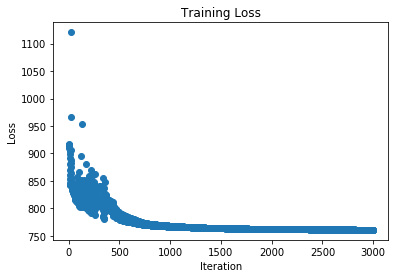

In [74]:
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [84]:
predicted = net.predict(x)

In [85]:
predicted[0:3].argmax(axis = 1)

array([0, 0, 0], dtype=int64)

In [86]:
predicted = predicted.argmax(axis = 1)

In [87]:
predicted.shape

(150,)

In [90]:
sum(predicted == iris.target) / len(iris.target)

0.9866666666666667

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix
predicted = np.argmax(net.predict(x), axis=1)



In [92]:
# accuracy
sum(predicted == iris.target) / len(iris.target)


0.9866666666666667

In [93]:
# accuracy
accuracy_score(iris.target, predicted)

0.9866666666666667

In [94]:
# confusion matrix
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

## 批次學習

In [114]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

In [116]:
import time

start = time.time()

net = ANN(input_size=4, hidden_size=5, output_size=3)

epochs     = 3000
lr         = 0.01
batch_size = 30

train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.numerical_gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
end = time.time()
print(end - start)

12.365999698638916


Text(0.5,1,'Training Loss')

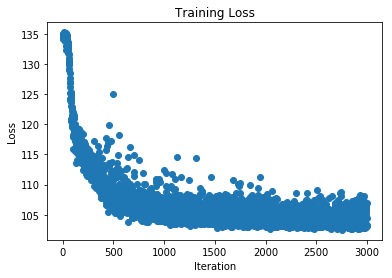

In [117]:

plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix
predicted = np.argmax(net.predict(x), axis=1)
# accuracy
sum(predicted == iris.target) / len(iris.target)
# accuracy
accuracy_score(iris.target, predicted)
# confusion matrix
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]], dtype=int64)

## 反向傳播

In [119]:
class Relu:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        self.cache = (x <=0)
        out = np.maximum(0,x)
        return out

    def backward(self, dout):
        dout[self.cache] = 0
        dx = dout
        return dx

In [122]:
import numpy as np
x= np.array([ [1.0 , -0.5], [-2.0, 3.0]])
layer = Relu()

print(layer.forward(x))
print(layer.cache)

loss= np.array([ [2.0 , 2.0], [6.0, 6.0]])
print(layer.backward(loss))

[[1. 0.]
 [0. 3.]]
[[False  True]
 [ True False]]
[[2. 0.]
 [0. 6.]]


In [123]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        y  = self.out
        dx = dout * y * (1-y)
        return dx

In [125]:
s = Sigmoid()
x = np.array([-1,1,2])
print(s.forward(x))

[0.26894142 0.73105858 0.88079708]


In [126]:
y = np.array([2,3,4])
print(s.backward(y))

[0.39322387 0.5898358  0.41997434]


In [127]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout)
        return dx

y = np.array([2,3,4])
print(s.backward(y))

[0.39322387 0.5898358  0.41997434]


In [128]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y_hat = None 
        self.y = None 

    def forward(self, x, y):
        self.y = y
        self.y_hat = softmax_function(x)
        self.loss = cross_entropy_err(self.y_hat, self.y)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        dx = (self.y_hat - self.y) / batch_size
        return dx

In [129]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

In [130]:
def softmax_function(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [132]:
import numpy as np
from collections import OrderedDict

class ANN:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return self.lastLayer.forward(y_hat, y)
  
    def gradient(self, x, y):
        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [134]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [135]:
import random
import time

epochs     = 3000
lr         = 0.01
batch_size = 30

net = ANN(input_size=4, hidden_size=5, output_size=3)

t0 =time.time()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.time() - t0

0.725994348526001

Text(0.5,1,'Training Loss')

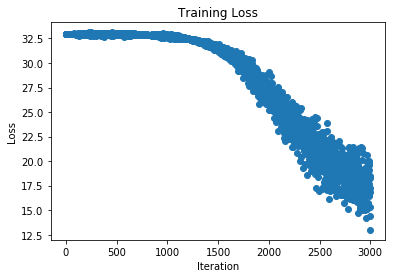

In [136]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')